Time Series Data Visualization with Python
https://machinelearningmastery.com/time-series-data-visualization-with-python/

When should I use a "groupby" in pandas?
https://www.youtube.com/watch?v=qy0fDqoMJx8

My top 25 pandas tricks
https://www.youtube.com/watch?v=RlIiVeig3hc


In [1]:
# Example #1

import pandas as pd
from matplotlib import pyplot

# The call to read_csv will load the CVS formatted dataset into a DataFrame.
# header=0    : Row number to use as the column names, and the start of the data.
# index_col=0 : Column to use as the row labels of the DataFrame.
df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)

# Call head to print the first 5 rows.
print(df.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


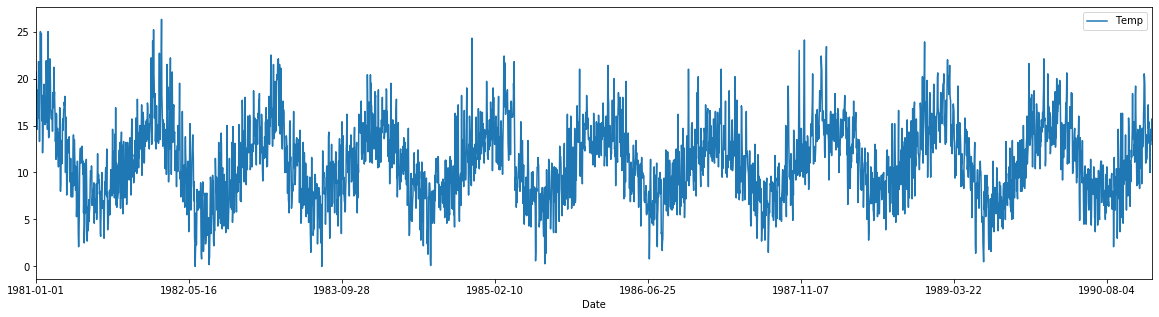

In [2]:
# Example #2 

import pandas as pd
from matplotlib import pyplot

# Plot a time series line plot with time shown on the x-axis and temp values along the y-axis.

df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
df.plot(figsize=(20,5))
pyplot.show()

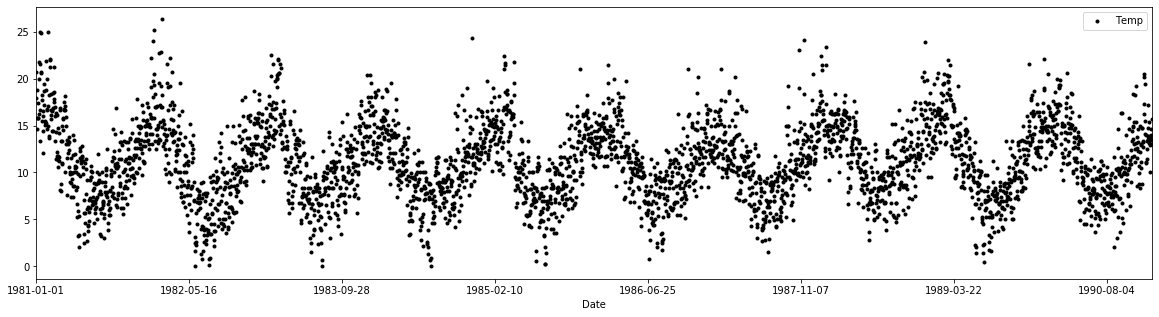

In [3]:
# Example #3

import pandas as pd
from matplotlib import pyplot

df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)

# Same time series line plot as above but using a style that uses dots vs dashes style='k-'
df.plot(style='k.', figsize=(20,5))

pyplot.show()

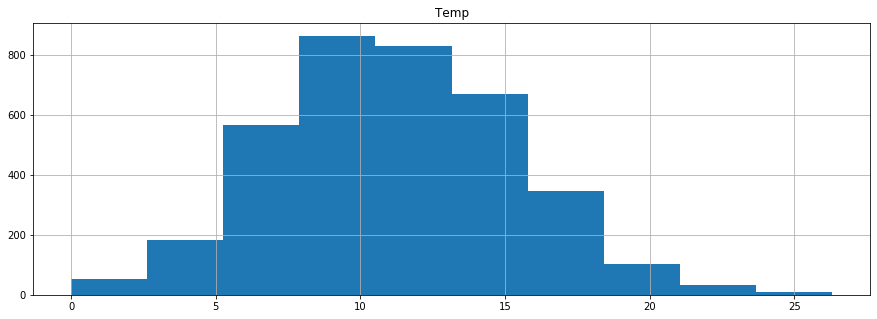

In [4]:
# Example #4

# The example below creates a histogram plot of the observations in the Minimum Daily Temperatures dataset.
# A histogram groups values into bins, and the frequency or count of observations in each bin can provide
# insight into the underlying distribution of the observations.

import pandas as pd
from matplotlib import pyplot

df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
df.hist(figsize=(15,5))
pyplot.show()

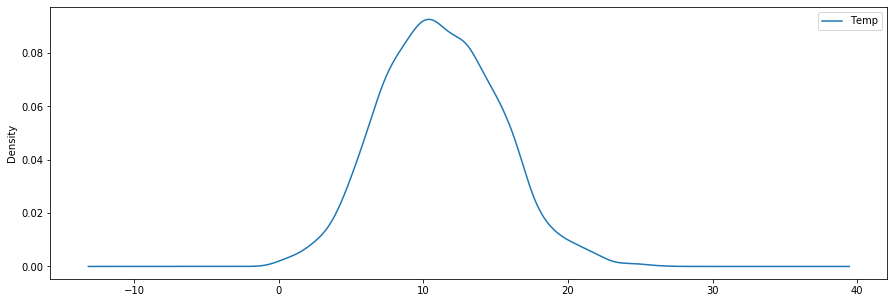

In [5]:
# Example #5

# Below is an example of a density plot of the Minimum Daily Temperatures dataset.

import pandas as pd
from matplotlib import pyplot

df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
df.plot(kind='kde', figsize=(15,5))
pyplot.show()

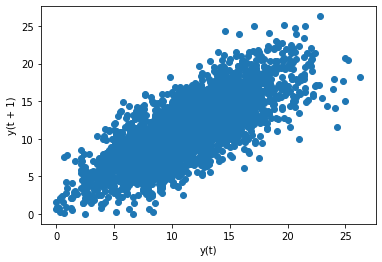

In [6]:
# Example #6

# Time Series Lag Scatter Plots assumes a relationship between an observation and the previous observation.
# Previous observations in a time series are called lags, with the observation at the previous time step 
# called lag1, the observation at two time steps ago lag2, and so on.

# A useful type of plot to explore the relationship between each observation and a lag of that observation 
# is called the scatter plot. Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

import pandas as pd
from matplotlib import pyplot

df = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)

pd.plotting.lag_plot(df)

pyplot.show()

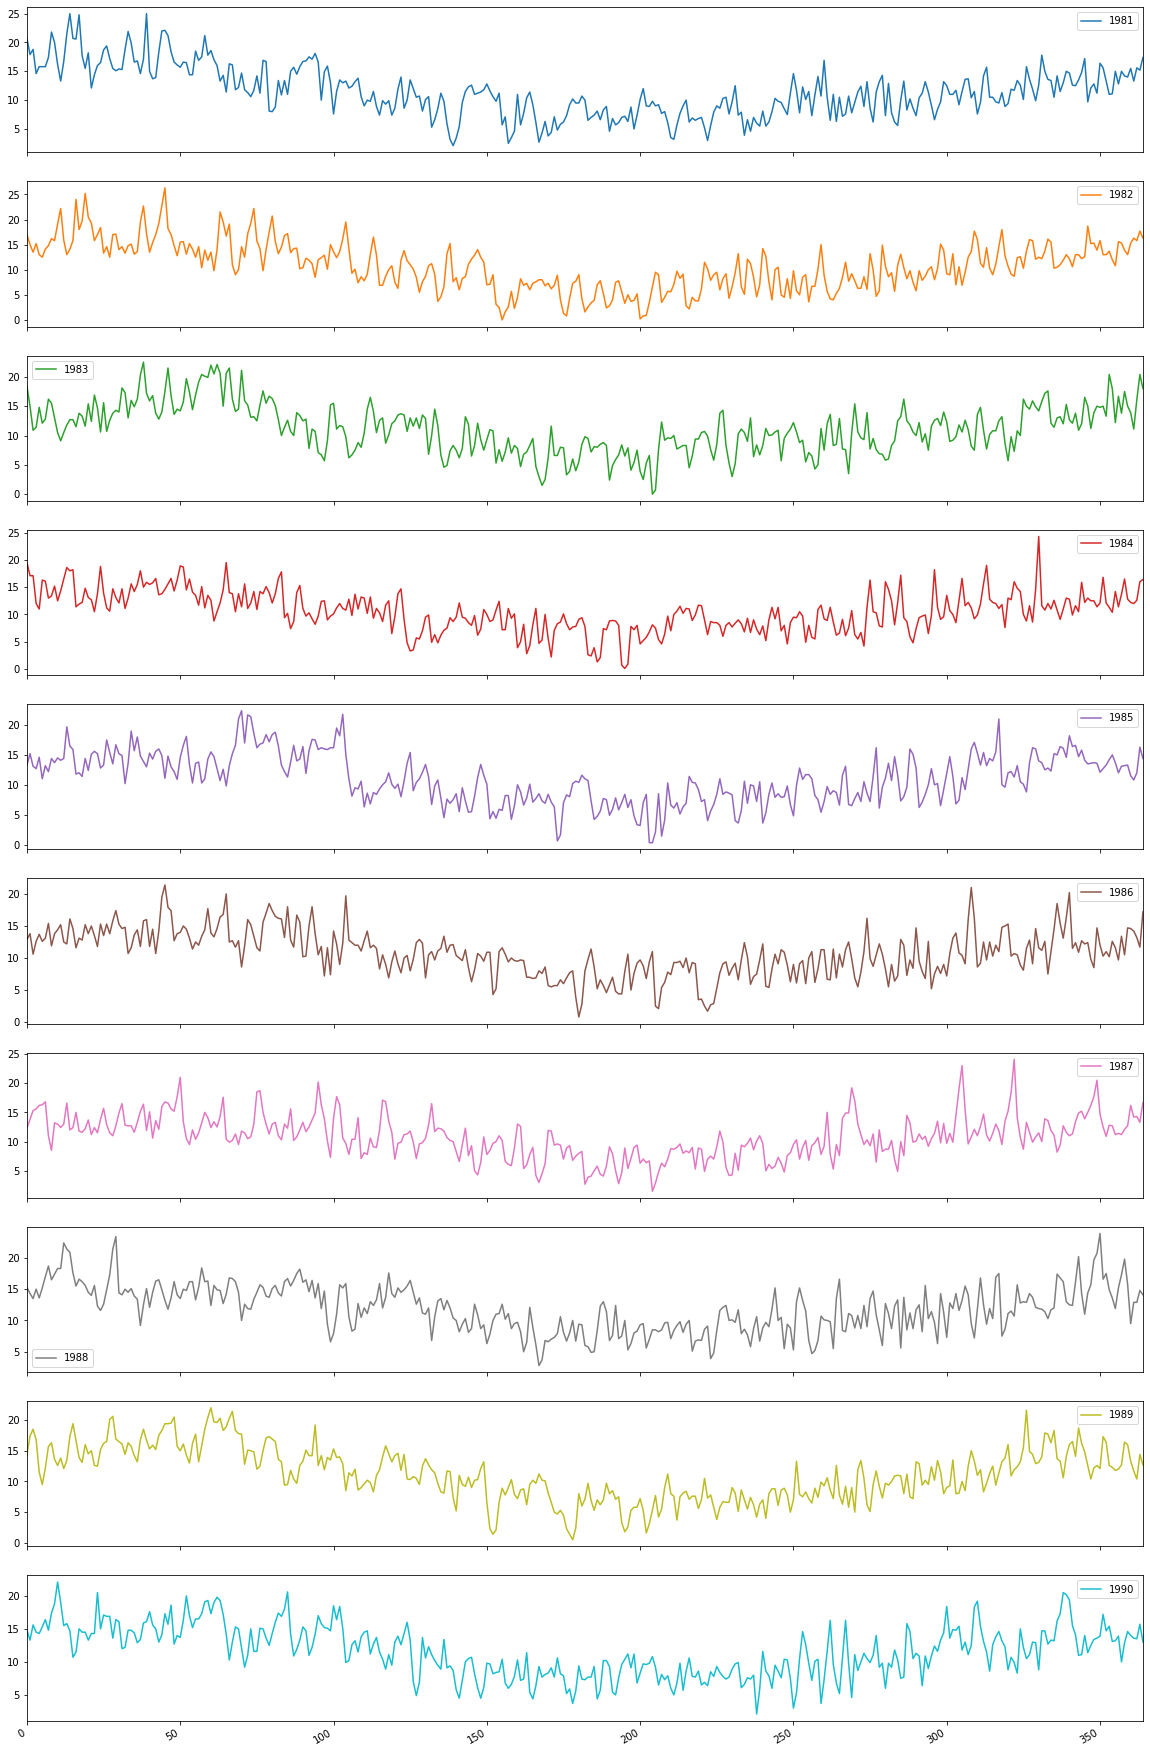

In [7]:
# Example #7

# Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with
# legends removed to cut back on the clutter.

# Running the example creates 10 line plots, one for each year from 1981 at the top and 1990 at the bottom,
# where each line plot is 365 days in length.

import pandas as pd
from matplotlib import pyplot

# We can add parse_dates=True, or parse_dates=['column name'] to our call to read_csv to force strings 
# that represent dates to be converted during the reading.
df = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=['Date'])

# But if your date string does not magically auto parse, you can create a date parser function, 
# which is more flexible. For example our date strings look like this '1981-12-31', so a custom
# datetime parser could be created like this:
#
# custom_date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
# df = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=['Date'], date_parser=custom_date_parser)

# Use a Grouper object to group by the key 'Date' and the frequency alias 'A', which stands for 'year end frequency'
groups = df.groupby(pd.Grouper(key='Date',freq='A'))

years = pd.DataFrame()

for name, group in groups:
    # Use [:, 1] to reshape the 2-dimensional array into a 1-dimensional 
    # array which pulls the temp data from index 1.
    years[name.year] = group.values[:, 1]

years.plot(subplots=True, figsize=(20,35))
pyplot.show()

In [8]:
# import pandas as pd
# from matplotlib import pyplot

# df = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=['Date'])

# groups = df.groupby(pd.Grouper(key='Date',freq='A'))

# years = pd.DataFrame()

# for name, group in groups:
#     years[name.year] = group.values[:, 1]

# #years.plot(subplots=True, figsize=(20,35))
# years.boxplot()

# #years.boxplot(by='Temp')

# #years.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])

# pyplot.show()

In [ ]:
# Misc Snippets:

# Find the number of missing values in each column!
df.apply(lambda x: sum(x.isNull(),axis=0))


# Fill in missing values with the mean for the data:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)